## Putting it all together! 

In this exercise, we will use the tools we have encountered this far, get acquainted with newer ones and put them to use to develop an elaborate program. 


### Task
Given a dataset of color images (RGB) of different fruit types, we want to build an automated classifier that can distinguish between the different classes. To keep it simple we provide pictures of different varieties of apples and oranges. The task then is, proverbially, *to tell Apples from Oranges*.

### Dataset

The complete dataset is provided as the archive data.zip. When uncompressed it conists of several directories. The names of these directories are the labels of the fruit type.Each directory has numerous pictures of the fruit type in JPG format.

In [1]:
# Some of the essential Python Packages to be loaded
# See how you can load a package using a different name; 
import numpy as np 
import glob
import matplotlib.pyplot as plt
# add any other packages you might need

In [2]:
orFiles = glob.glob('data/Oranges/*.jpg')
print(len(orFiles))

160


In [3]:
# The data is provided in two folders with names
# Apples and Oranges.
# Read the file names using glob.glob()

# Count the number of apples and oranges

orFiles = glob.glob('data/Oranges/*.jpg')
nOranges = len(orFiles)

apFiles = glob.glob('data/Apples/*.jpg')
nApples = len(apFiles)
nFeatures = 3
print("Dataset contains %d apples and %d oranges" %(nApples,nOranges))

Dataset contains 164 apples and 160 oranges


data/Oranges/88_100.jpg


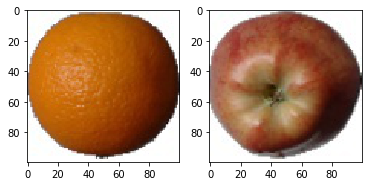

In [4]:
print(orFiles[0])
plt.subplot(1,2,1)
# Show some sample oranges and apples using pyplot
sOrg = plt.imread(orFiles[10])
plt.imshow(sOrg)

plt.subplot(1,2,2)
sApp = plt.imread(apFiles[10])
plt.imshow(sApp)

In [5]:
sApp.mean(axis=0).mean(axis=0)

array([163.8099, 125.5839, 107.0006])

In [6]:
# We would like to extract some features 
# to be able to compare apples vs oranges

# Can  you think of what features might be 
# most useful?


# Initialise empty arrays to hold some features
orFeatures = np.zeros((nOranges,nFeatures))
apFeatures = np.zeros((nApples,nFeatures))

In [7]:
# We need to assign "labels" to distinguish 
# apples from oranges

# Usually the two classes are mapped to two numbers
# We use 0 -> oranges and 1 -> apples
orLabels = np.zeros(nOranges)
apLabels = np.ones(nApples)

In [8]:
# Feature extraction 
# One of the basic features that can be extracted is the average intensity
# of the R, G, B channels. 
# Steps:
# 1. Load image data
# 2. Convert it into numpy array
# 3. Extract 3 features 

for i in range(nOranges):
    orImg = plt.imread(orFiles[i])
    orFeatures[i] = orImg.mean(0).mean(0)

In [9]:

for i in range(nApples):
    apImg = plt.imread(apFiles[i])
    apFeatures[i] = apImg.mean(0).mean(0)

In [10]:
def extractFeatures(fNames,F=3):
    N = len(fNames)

    features = np.zeros((N,F))
    for i in range(N):
        img = plt.imread(fNames[i])
        features[i] = img.mean(0).mean(0)
    return features
    

In [11]:
orFeatures = extractFeatures(orFiles)

In [12]:
apFeatures = extractFeatures(apFiles)

In [13]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

Text(0.5, 0, 'G')

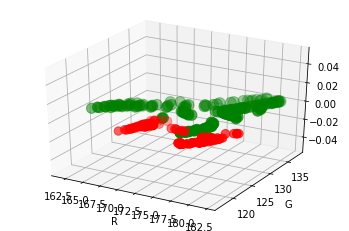

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(orFeatures[:,0],orFeatures[:,1],
           orFeatures[:,2],c='r')
plt.scatter(apFeatures[:,0],apFeatures[:,1],
           apFeatures[:,2],c='g')
plt.xlabel('R')
plt.ylabel('G')


In [15]:
# %matplotlib qt

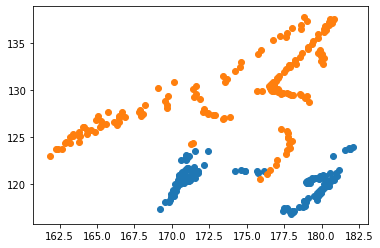

In [16]:
# Visualise the pairwise features
plt.scatter(orFeatures[:,0],orFeatures[:,1])
plt.scatter(apFeatures[:,0],apFeatures[:,1])

In [17]:
# make the dataset

# Combine features of both oranges and apples into
# a single array. Same for labels. 
X = np.concatenate((orFeatures,apFeatures),axis=0)
Y = np.concatenate((orLabels,apLabels))


In [18]:
shuffleIdx = np.random.permutation(len(Y))

In [19]:
# yShuffle

In [20]:

# Let us shuffle the data! 
shuffleIdx = np.random.permutation(len(Y))
xShuffle = X[shuffleIdx]
yShuffle = Y[shuffleIdx]



In [21]:
# Split the data into training and test data
N = len(yShuffle)
nTrain = int(0.6*N)
nTest = N - nTrain
print(nTrain,nTest)

194 130


In [28]:
# Let us use only the first two features. 
xTrain, yTrain = xShuffle[:nTrain,:2], yShuffle[:nTrain]
xTest, yTest = xShuffle[nTrain:,:2], yShuffle[nTrain:]

In [29]:
# Now that our data is ready. Let us use a classifier.


# We will use another linear classifier
# Logistic regression learns a linear boundary 
# to classify binary class of inputs

from sklearn.linear_model import LogisticRegression

In [30]:
clf = LogisticRegression(random_state=0,solver='lbfgs').fit(xTrain, yTrain)

# Print the model coefficients.
print("Logistic regression parameters: ",clf.coef_[0],clf.intercept_[0])


Logistic regression parameters:  [-0.11783806  1.27282913] -136.68796920863085


In [31]:
# Check the performance on the training dataset
yTrPred = clf.predict(xTrain)
accTrain = sum(yTrPred == yTrain)/nTrain
print("Training accuracy is: %.2f"%accTrain)

Training accuracy is: 0.97


In [32]:
# Check the performance on the training dataset
yTsPred = clf.predict(xTest)
accTest = sum(yTsPred == yTest)/nTest
print("Test accuracy is: %.2f"%accTest)

Test accuracy is: 0.97


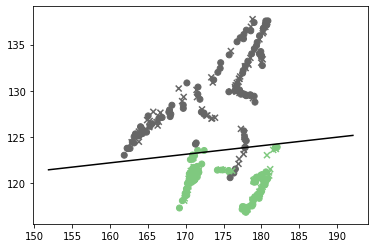

In [38]:
w = clf.coef_[0]
a = -w[0] / w[1]
xMax = X[:,0].max()+10
xMin = X[:,0].min()-10
xx = np.linspace(xMax, xMin) 
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')
plt.scatter(xTrain[:,0],xTrain[:,1],marker='o',c=yTrain,cmap='Accent')

plt.scatter(xTest[:,0],xTest[:,1],marker='x',c=yTest,cmap='Accent')